## **CNN MODELLING**

**Connect to Drive**

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Import Libraries**

In [ ]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Loading Train-Test-Validation Datasets**

In [ ]:
X_train = np.load('/content/drive/MyDrive/Google_Colab/X_train.npy')
y_train = np.load('/content/drive/MyDrive/Google_Colab/y_train.npy')

X_val = np.load('/content/drive/MyDrive/Google_Colab/X_val.npy')
y_val = np.load('/content/drive/MyDrive/Google_Colab/y_val.npy')

X_test = np.load('/content/drive/MyDrive/Google_Colab/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Google_Colab/y_test.npy')

**Create a Model Object**

* Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

In [ ]:
model = tf.keras.Sequential()

**Adding Convuliton and Max Pooling Layers**

* For the first two layers, we add a convolution and max pooling layer.

* Then, we add more layers. One convolution, one max pooling, and one convolution layer again.

* To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

* We can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

* As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu",
                                 input_shape=(32, 32, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# Add a convolution and max pooling layer

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))


**Model Compiling**

Now we have the structure of our model. To configure the model for training, we'll use the .compile() method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Sparse Categorical Crossentropy" for the loss function

In [ ]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

**Training The Model**

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.


In [ ]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = 50,
                    validation_data = (X_val, y_val))

Epoch 1/50
48/48 [==============================] - 12s 15ms/step - loss: 2.2023 - accuracy: 0.1659 - val_loss: 1.9880 - val_accuracy: 0.2931
Epoch 2/50
48/48 [==============================] - 0s 7ms/step - loss: 1.9421 - accuracy: 0.2886 - val_loss: 1.6246 - val_accuracy: 0.4313
Epoch 3/50
48/48 [==============================] - 0s 7ms/step - loss: 1.7693 - accuracy: 0.3478 - val_loss: 1.4594 - val_accuracy: 0.4863
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 1.6350 - accuracy: 0.3928 - val_loss: 1.3394 - val_accuracy: 0.5344
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 1.5242 - accuracy: 0.4442 - val_loss: 1.2745 - val_accuracy: 0.5611
Epoch 6/50
48/48 [==============================] - 0s 8ms/step - loss: 1.4369 - accuracy: 0.4827 - val_loss: 1.1446 - val_accuracy: 0.6069
Epoch 7/50
48/48 [==============================] - 0s 7ms/step - loss: 1.3501 - accuracy: 0.5111 - val_loss: 1.0514 - val_accuracy: 0.6511
Epoch 8/50
48/48 [

**Visualize the Results**

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

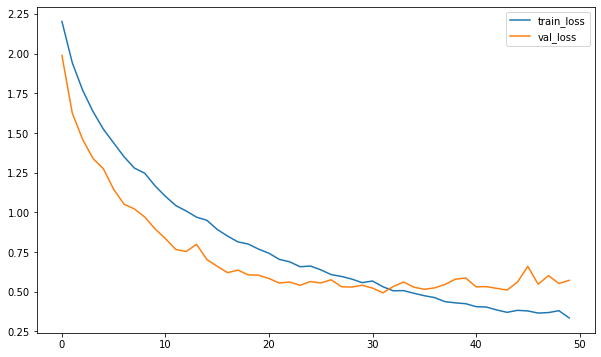

In [ ]:
plt.figure(figsize = (10,6))

# Plot the training Loss
plt.plot(results.history["loss"], label = "train_loss")

# Plot the validaiton Loss
plt.plot(results.history["val_loss"], label = "val_loss")

# Name the x and y axises
plt.xlabel = ("Epoch")
plt.ylabel = ("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

Now do the same thing for accuracy.

Accuracy scores can be found in:
* results.history["accuracy"]
* results.history["val_accuracy"]

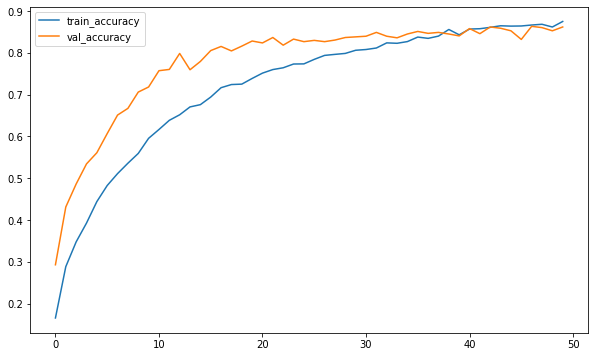

In [ ]:
plt.figure(figsize=(10,6))

# Plot the training accuracy
plt.plot(results.history["accuracy"], label = "train_accuracy")

# Plot the validation accuracy
plt.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
plt.xlabel = ("Epoch")
plt.ylabel = ("Accuracy")

# Put the legend table
plt.legend()

# Show the plot
plt.show()

**Performance Evaluating**

Let's use the test dataset we created to evaluate the performance of the model.

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.8580


[0.6124961972236633, 0.858015239238739]

**Prediction for Reshaped Sample**

Next, we take the sample we selected at the beginning and make a prediction on it.


In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 32, 32, 1))

# Print the predictio result
prediction_result

array([[1.3146029e-04, 5.4604874e-04, 5.1376242e-03, 4.3042572e-03,
        2.3453013e-06, 1.1812969e-03, 4.4180329e-06, 3.9589870e-07,
        9.8634768e-01, 2.3444965e-03]], dtype=float32)

Finally, we find the predicted class and prediction probability and print the results.

* Use .argmax() to find the class.

* Use .max() to find the probability.

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

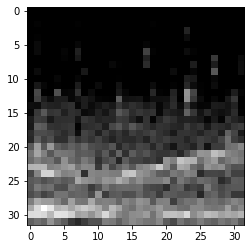

(32, 32)
This image belogs to class 8 with 0.9863476753234863 probability %
The actual class of the selected image is: [8]


In [ ]:
plt.imshow(X_test[100], cmap = "gray")
plt.show()

print(X_test[100].shape)

# Print the results
print(f"This image belogs to class {predicted_class} with {predicted_probability} probability %")
print(f"The actual class of the selected image is: {y_test[100]}")